In [9]:
import numpy as np
import pylab as p
from scipy.integrate import quad
from scipy.optimize import curve_fit

In [10]:
def cauchy(x):
    return 1/np.pi*1/(1+(x-1)**2)   

def cumul_inv(x):
    return np.tan(np.pi*x-np.pi/2) + 1

def inv(N):
    x = np.random.rand(N)
    return cumul_inv(x)

def estimador1(M,N):
    A = np.zeros(N)
    for i in range(N):
        x = inv(M)
        A[i] = np.sum(x)/M
    return A

def neumann_cont2(N,alpha):
    A = np.array([])
    x = np.linspace(-100,100,1000)
    c = max(rho(x,alpha)/cauchy(x))
    while len(A) < N:
        arr = inv(N)
        p =np.random.rand(N)
        B = arr[np.where(p<(rho(arr,alpha)/(cauchy(arr)*c)))]
        A = np.concatenate((A,B))
    return A[:N]
    A = np.copy(A[:N])
    return A

def rho1(x,alpha):
    return 1/(1 + np.abs(x-1)**alpha)

def rho(x,alpha):
    return 1/I[0]*1/(1 + np.abs(x-1)**alpha)
def estimador(M,N,alpha):
    S = np.zeros(N)
    for i in range(N):
        m = neumann_cont2(M,alpha)
        S[i] = np.sum(m)/M
    return S


# Exercício 1

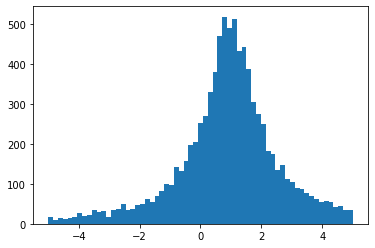

In [11]:
N = 10000
    
x = inv(N)
p.hist(x, bins = 'auto',range=(-5,5))
p.show()

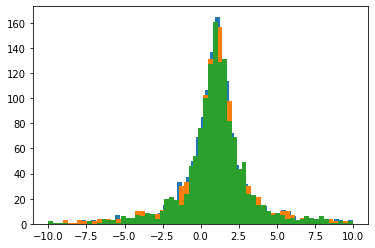

In [12]:

N = 1500
for M in [16,64,256]:
    S = np.copy(estimador1(M,N))
    p.hist(S, bins = 'auto', range = (-10,10))
p.show()

# Exercício 2

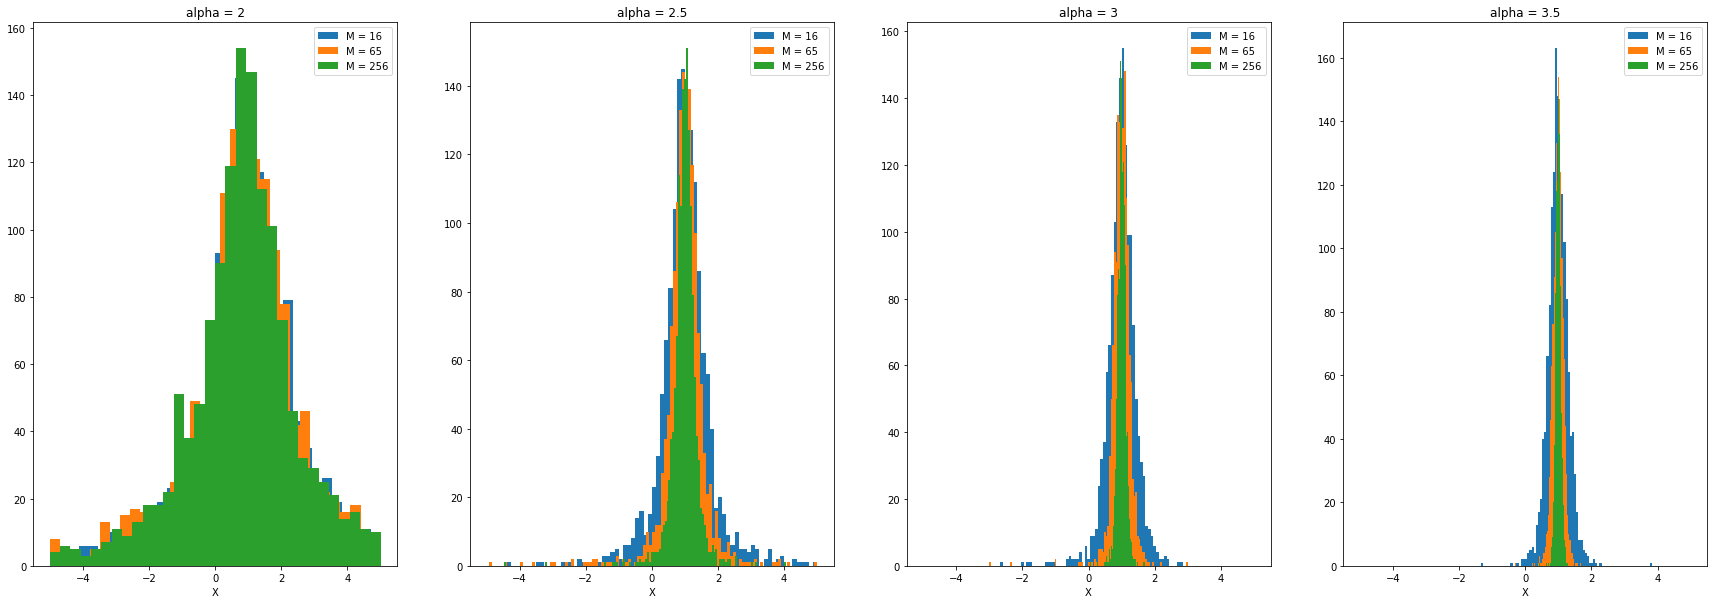

In [13]:
N = 1500
fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()
j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    for M in [16,65,256]:
        S = estimador(M,N,alpha)
        axs[j].hist(S,bins = 'auto',range=(-5,5),label = 'M = ' + str(M))
        axs[j].set_title('alpha = ' + str(alpha))
        axs[j].set_xlabel('X')
        axs[j].legend()
p.show()

# Exercício 3

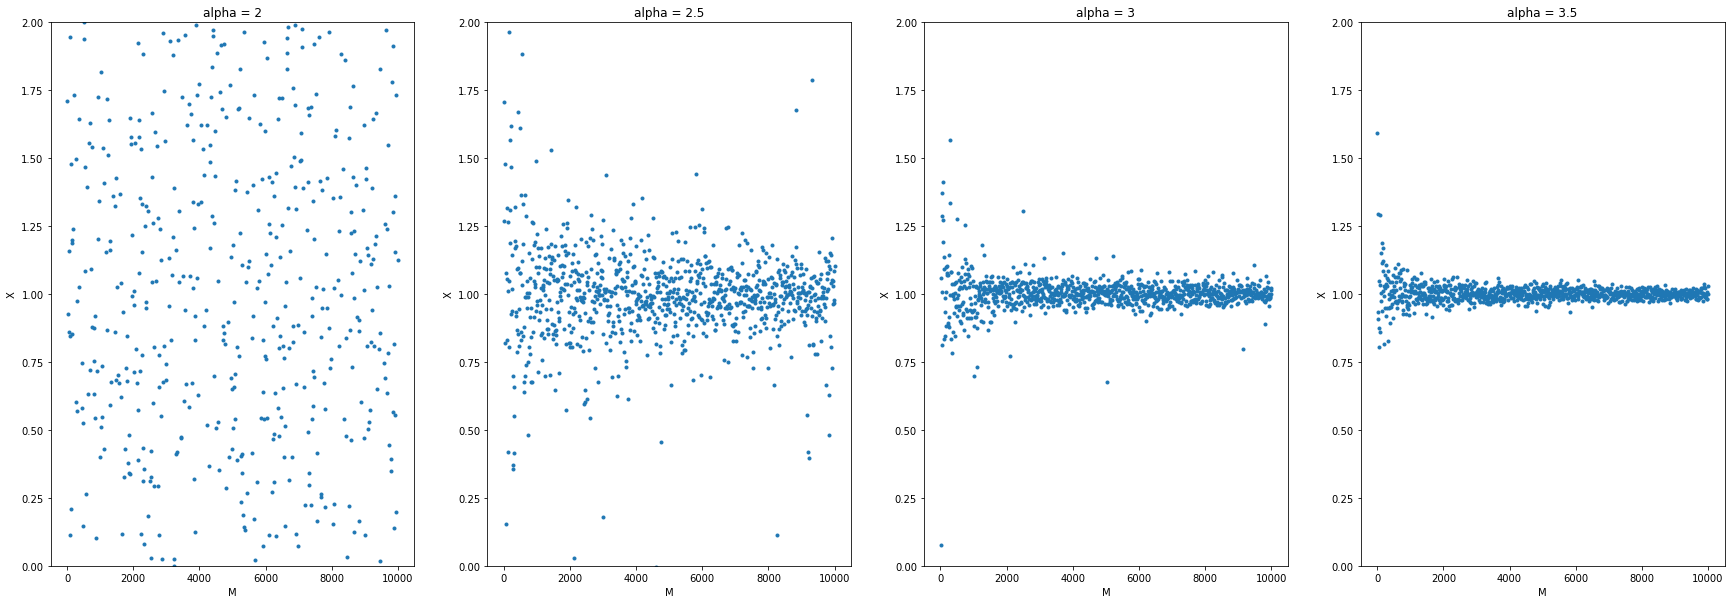

In [19]:
fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()
Matriz = np.linspace(1,10000,1000)
def estimador_media(Matriz):
    A = np.zeros(len(Matriz))
    for i in range(len(Matriz)):
        A[i] = np.sum(neumann_cont2(int(Matriz[i]),alpha))/int(Matriz[i])
    return A
j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    A2 = estimador_media(Matriz)
    axs[j].plot(Matriz,A2,'.')
    axs[j].set_title('alpha = ' + str(alpha))
    axs[j].set_xlabel('M')
    axs[j].set_ylabel('X')
    axs[j].set_ylim(-0,2)
p.show()

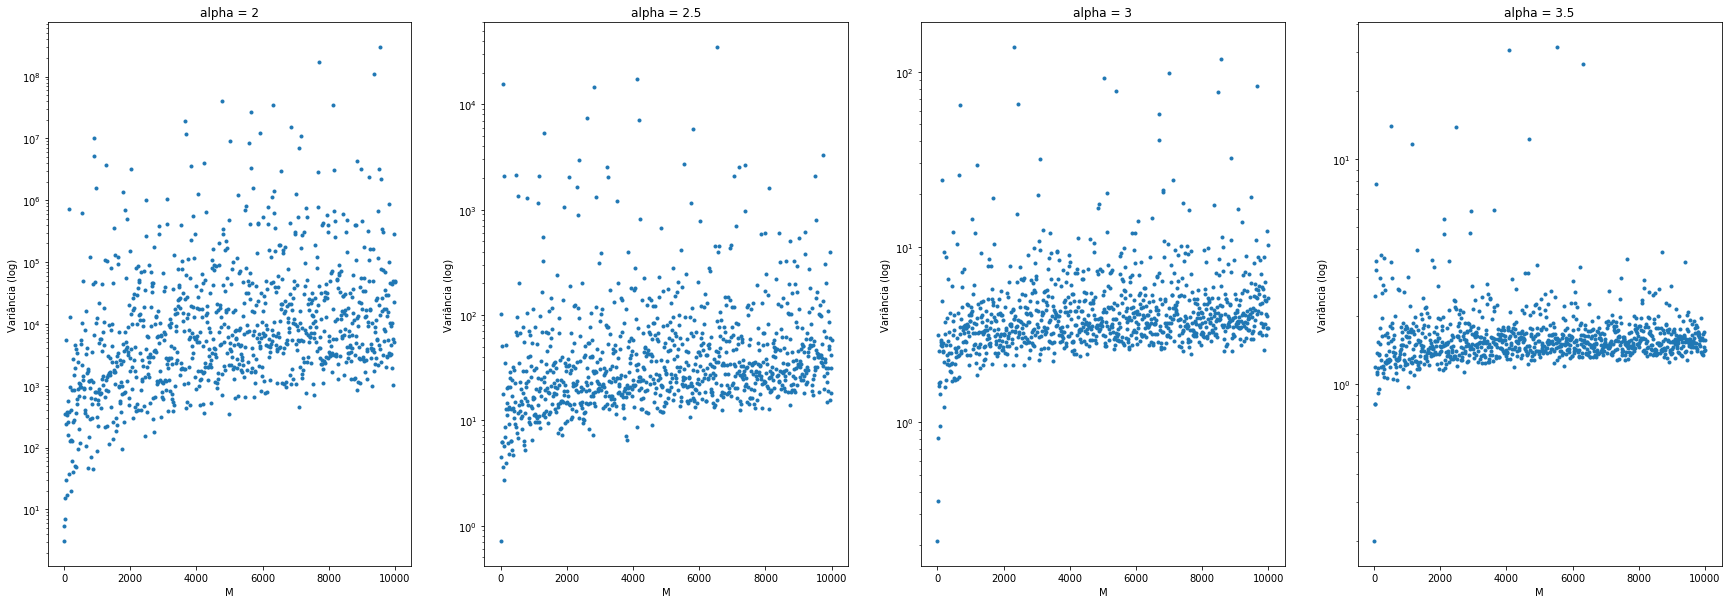

In [23]:
Matriz1 = np.linspace(2,10000,1000)
Matriz = Matriz1.astype(int)

fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()

def estimador_variancia(M,alpha):
    variancia = np.zeros(len(M))
    for i in range(len(M)):
        x = neumann_cont2(M[i],alpha)
        media = np.sum(x)/M[i]
        S = (x - media)**2
        variancia[i] = np.sum(S)/(M[i]-1)
    return variancia

j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    A2 = estimador_variancia(Matriz,alpha)
    axs[j].plot(Matriz,A2,'.')
    axs[j].set_title('alpha = ' + str(alpha))
    axs[j].set_xlabel('M')
    axs[j].set_ylabel('Variância (log)')
    axs[j].set_yscale('log')
p.show() 

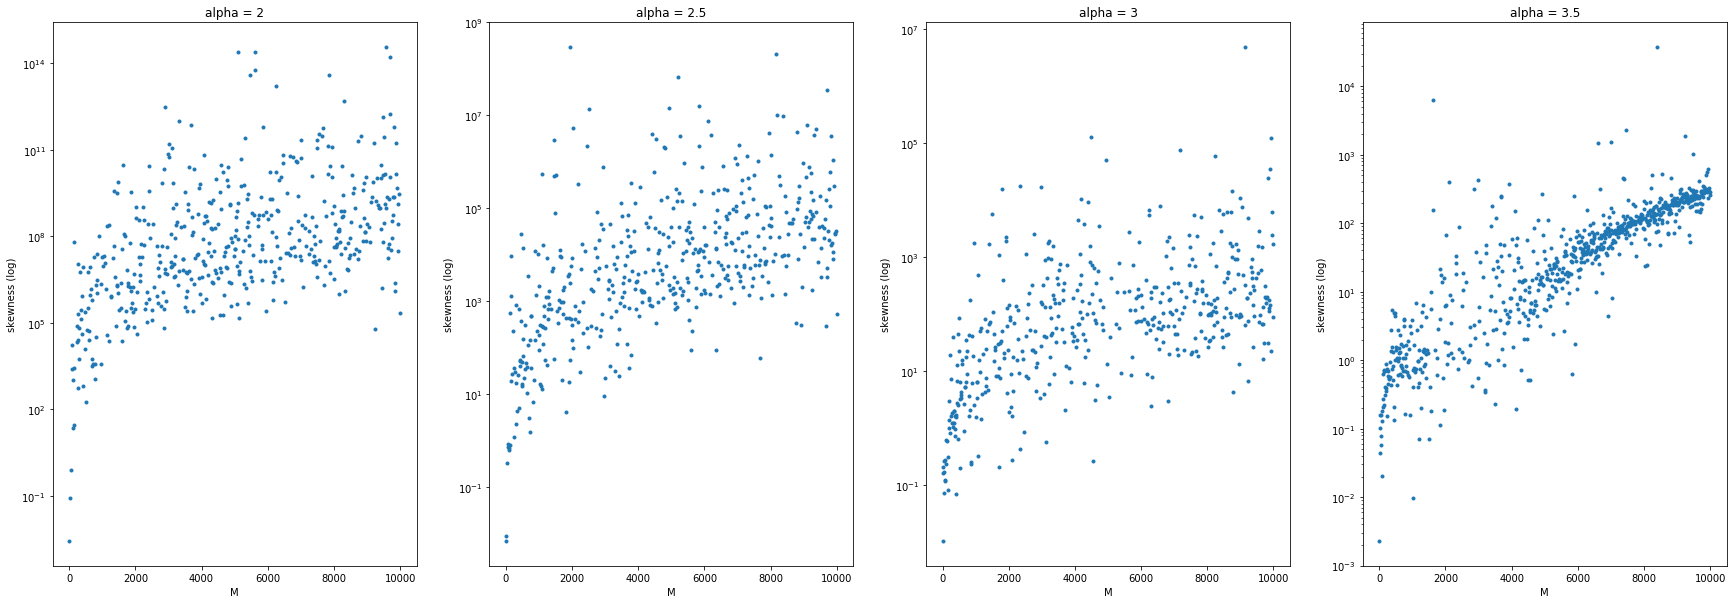

In [26]:
Matriz1 = np.linspace(2,10000,1000)
Matriz = Matriz1.astype(int)

fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()


def estimador_skewness(M,alpha):
    skewness = np.zeros(len(M))
    for i in range(len(M)):
        x = neumann_cont2(M[i],alpha)
        m3 = np.sum(x**3)/N
        m2 = np.sum(x**2)/N
        m1 = np.sum(x)/N
        skewness[i] = m3 -3*m2*m1 + 2*m1**3
    return skewness
j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    A2 = estimador_skewness(Matriz,alpha)
    axs[j].plot(Matriz,A2,'.')
    axs[j].set_title('alpha = ' + str(alpha))
    axs[j].set_xlabel('M')
    axs[j].set_ylabel('skewness (log)')
    axs[j].set_yscale('log')
p.show() 

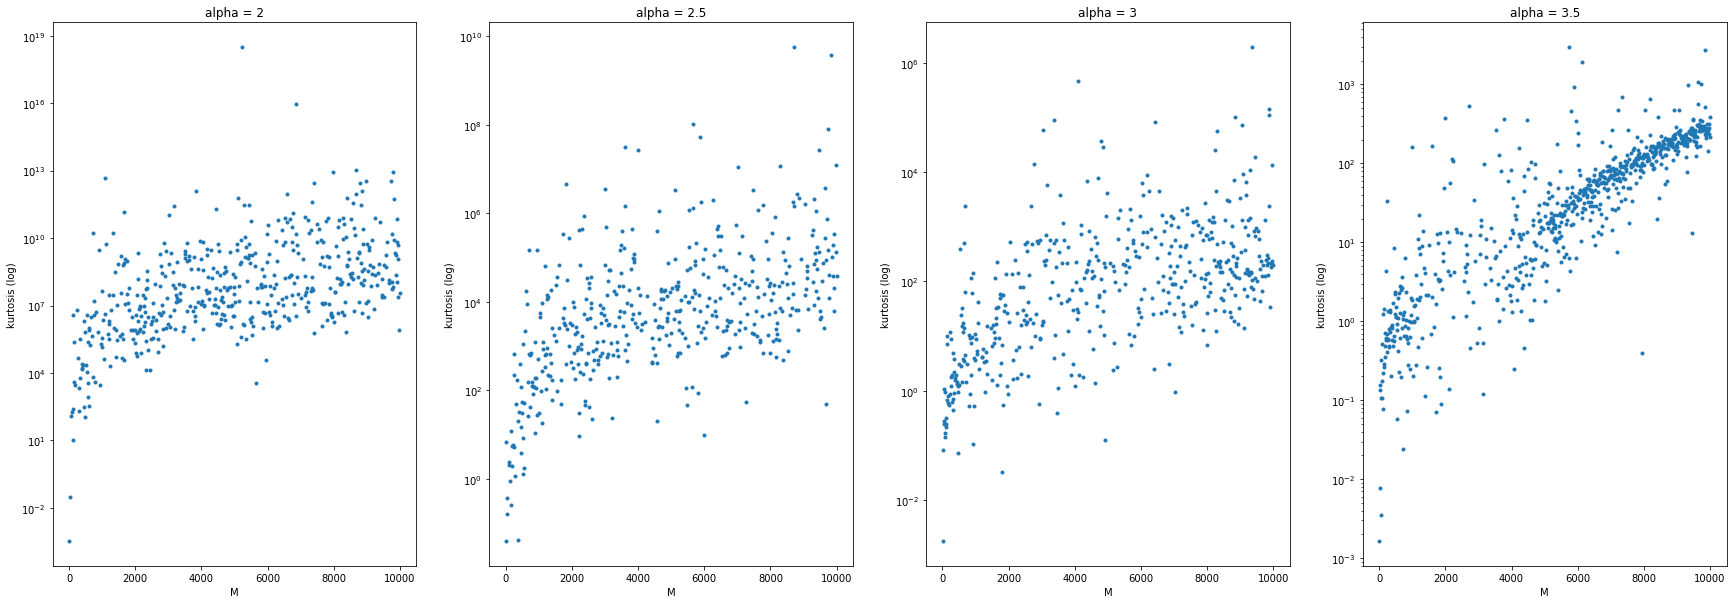

In [27]:
Matriz1 = np.linspace(2,10000,1000)
Matriz = Matriz1.astype(int)

fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()

def estimador_kurtosis(M,alpha):
    kurtosis = np.zeros(len(M))
    for i in range(len(M)):
        x = neumann_cont2(M[i],alpha)
        m4 = np.sum(x**4)/N
        m3 = np.sum(x**3)/N
        m2 = np.sum(x**2)/N
        m1 = np.sum(x)/N
        kurtosis[i] = m4 -4*m3 -3*m2**2 +12*m2*m1**2 -6*m1**4
    return kurtosis
j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    A2 = estimador_skewness(Matriz,alpha)
    axs[j].plot(Matriz,A2,'.')
    axs[j].set_title('alpha = ' + str(alpha))
    axs[j].set_xlabel('M')
    axs[j].set_ylabel('kurtosis (log)')
    axs[j].set_yscale('log')
p.show() 

# Exercício 4

In [621]:
alpha = 4
def rho1(x,alpha):
    return 1/(1 + np.abs(x-1)**alpha)


I = quad(rho1, -10000,+10000, args=alpha)
print(1/I[0])
print(np.sqrt(2)/np.pi)
def rho(x,alpha):
    return 1/I[0]*1/(1 + np.abs(x-1)**alpha)

def neumann_cont2(N,alpha):
    A = np.array([])
    x = np.linspace(-100,100,1000)
    c = max(rho(x,alpha)/cauchy(x))
    while len(A) < N:
        arr = inv(N)
        p =np.random.rand(N)
        B = arr[np.where(p<(rho(arr,alpha)/(cauchy(arr)*c)))]
        A = np.concatenate((A,B))
    return A[:N]

k = np.linspace(-1,1,10000)

def soma(N,k):
    x = neumann_cont2(N,alpha)
    S = np.exp(-1j*np.outer(k,x))
    phi = np.sum(S,axis = 1)/N
    return phi**N


    

0.4501581580786882
0.450158158079


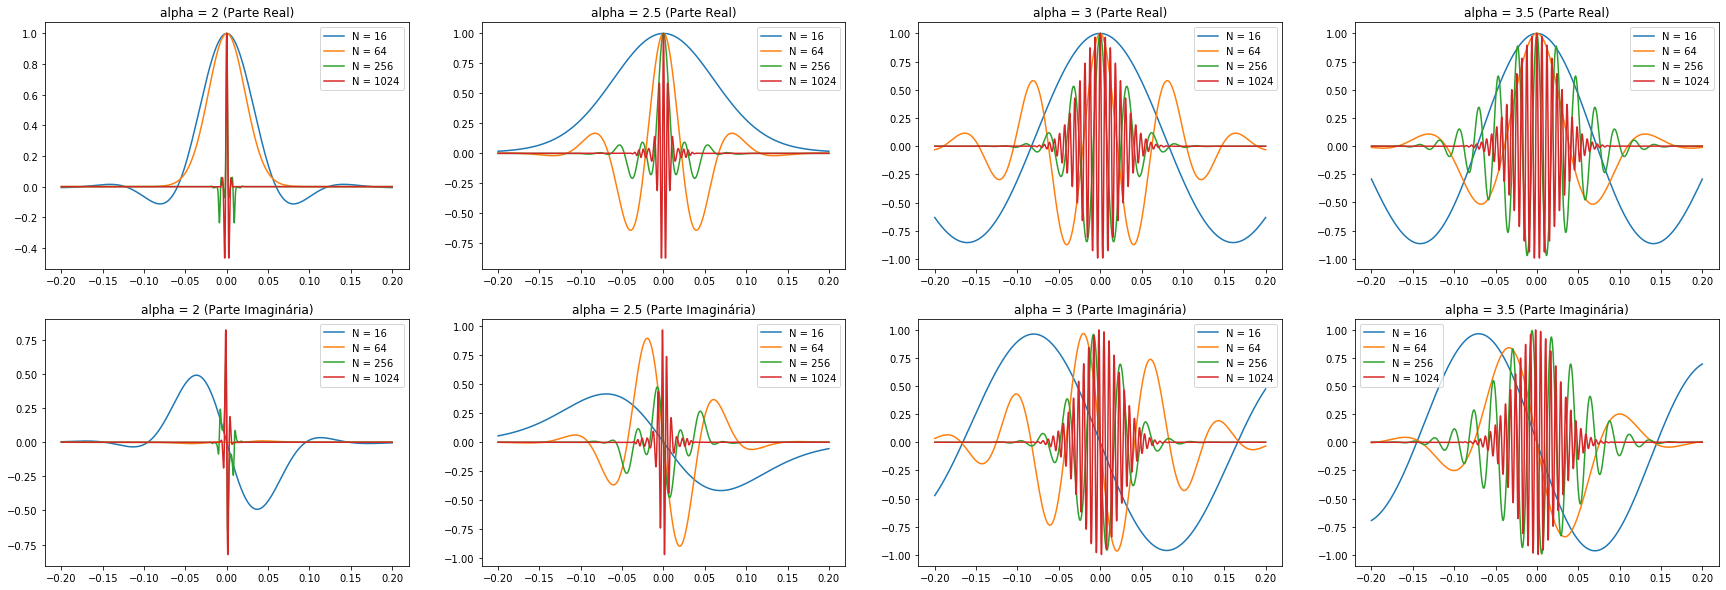

In [640]:
fig, axs = p.subplots(2,4, figsize = (30,10))
axs = axs.ravel()
j = -1
for alpha in [2,2.5,3,3.5]:
    j += 1
    for N in [16,64,256,1024]:
        I = quad(rho1, -10000,+10000, args=alpha)
        k = np.linspace(-0.2,0.2,10000)
        phi = soma(N,k)
        axs[j].plot(k,np.real(phi), label = 'N = ' + str(N))
        axs[j].set_title('alpha = ' + str(alpha) + ' (Parte Real)')
        axs[j].legend()
        axs[j + 4].plot(k,np.imag(phi), label = 'N = ' + str(N))
        axs[j + 4].set_title('alpha = ' + str(alpha) + ' (Parte Imaginária)')
        axs[j + 4].legend()
p.show()

2.50897795344


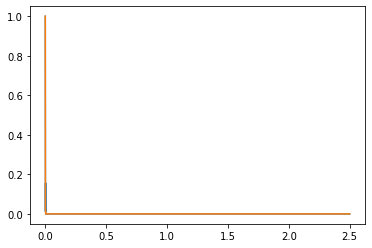

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


0.0745199959324


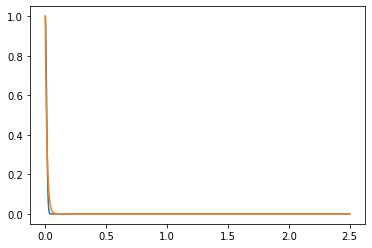

0.0580628717095


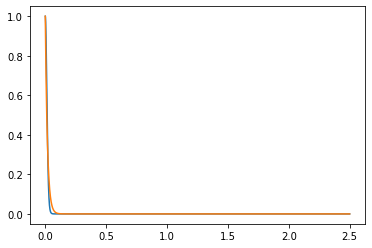

0.0304935656103


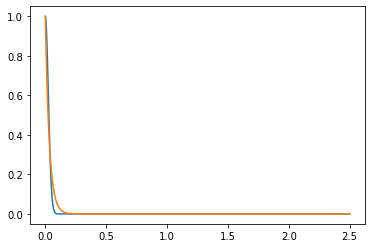

In [641]:
def f(x,a):
    return np.exp(-a*N*np.abs(x))
for alpha in [2,2.5,3,3.5]:

    def rho1(x,alpha):
        return 1/(1 + np.abs(x-1)**alpha)


    I = quad(rho1, -10000,+10000, args=alpha)

    def rho(x,alpha):
        return 1/I[0]*1/(1 + np.abs(x-1)**alpha)
    k = np.linspace(0,2.5,10000)
    N = 1000
    phi = np.abs(soma(N,k))
    popt, pcov = curve_fit(f,k,phi)
    print(popt[0])
    p.plot(k,phi)
    p.plot(k,f(k,popt[0]))
    p.show()


/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


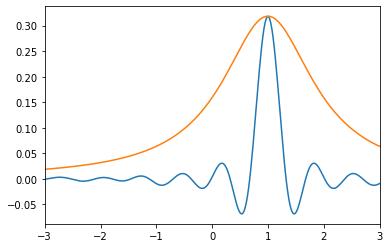

In [643]:
def rho2(N,k):
    return N/2*np.exp(-N*np.abs(k))

def neumann_cont(N,a,b):
    A = np.array([])
    while len(A) < N:
        arr = np.random.rand(N)*(b-a) + a
        p =np.random.rand(N)
        B = arr[np.where(p<rho2(N,arr))]
        A = np.concatenate((A,B))
    return A

def soma_k(N,a,b,x):
    x1 = x - 1 
    k = neumann_cont(N,a,b)
    S = np.exp(1j*N*np.outer(x1,k))
    phi = np.sum(S,axis = 1)/(np.pi*N)
    return phi

for N in [10000]:
    x = np.linspace(-10,10,1000)
    phi = soma_k(N,-10,10,x)
    p.plot(x,phi)
p.xlim(-3,3)
p.plot(x,cauchy(x))
p.show()

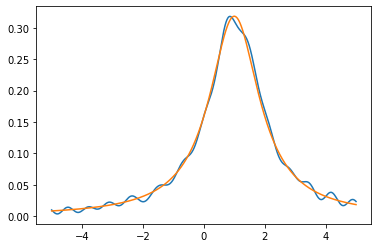

In [729]:
def rho2(k,N):
    return 1/2*np.exp(-np.abs(k))
alpha = 2
def rho1(x,alpha):
    return 1/(1 + np.abs(x-1)**alpha)
I = quad(rho1, -10000,+10000, args=alpha)
def rho(x,alpha):
    return 1/I[0]*1/(1 + np.abs(x-1)**alpha)

def neumann_cont2(N,alpha):
    A = np.array([])
    x = np.linspace(-100,100,1000)
    c = max(rho(x,alpha)/cauchy(x))
    while len(A) < N:
        arr = inv(N)
        p =np.random.rand(N)
        B = arr[np.where(p<(rho(arr,alpha)/(cauchy(arr)*c)))]
        A = np.concatenate((A,B))
    return A[:N]

def neumann(M,a,b,N = 1):
    A = np.array([])
    while len(A) < M:
        k = np.random.rand(M)*(b-a) + a 
        p = np.random.rand(M)
        B = k[np.where(p<rho2(k,N))]
        A = np.concatenate((A,B))
    return A[:M]

def soma(M,k,N = 1):
    x = neumann_cont2(M,alpha)
    S = np.exp(-1j*np.outer(k,x))
    A = np.sum(S, axis = 1)/M
    return A**N

M = 10000
k = neumann(M,-30,30)
phi = soma(M,k)
x = np.linspace(-5,5,1000)
S = np.exp(1j*np.outer(x,k))*np.ones((len(x),len(k)))*(phi/np.exp(-np.abs(k)))

final = np.sum(S, axis = 1)*1/M/np.pi
p.plot(x,np.real(final))
p.plot(x,cauchy(x))
p.show()


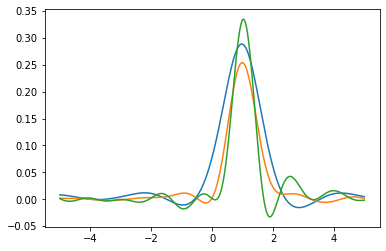

In [752]:
def rho2(k,N):
    return N/2*np.exp(-N*np.abs(k))
alpha = 2

I = quad(rho1, -10000,+10000, args=alpha)




M = 10000
for N in [16,64,256]:
    k = neumann(M,-30,30,N)
    phi = soma(M,k,N)
    x = np.linspace(-5,5,1000)
    S = np.exp(N*1j*np.outer(x,k))*np.ones((len(x),len(k)))*(phi/np.exp(-N*np.abs(k)/np.sqrt(2)))

    final = np.sum(S, axis = 1)*1/M/np.pi*np.sqrt(2)
    p.plot(x,np.real(final))
p.show()

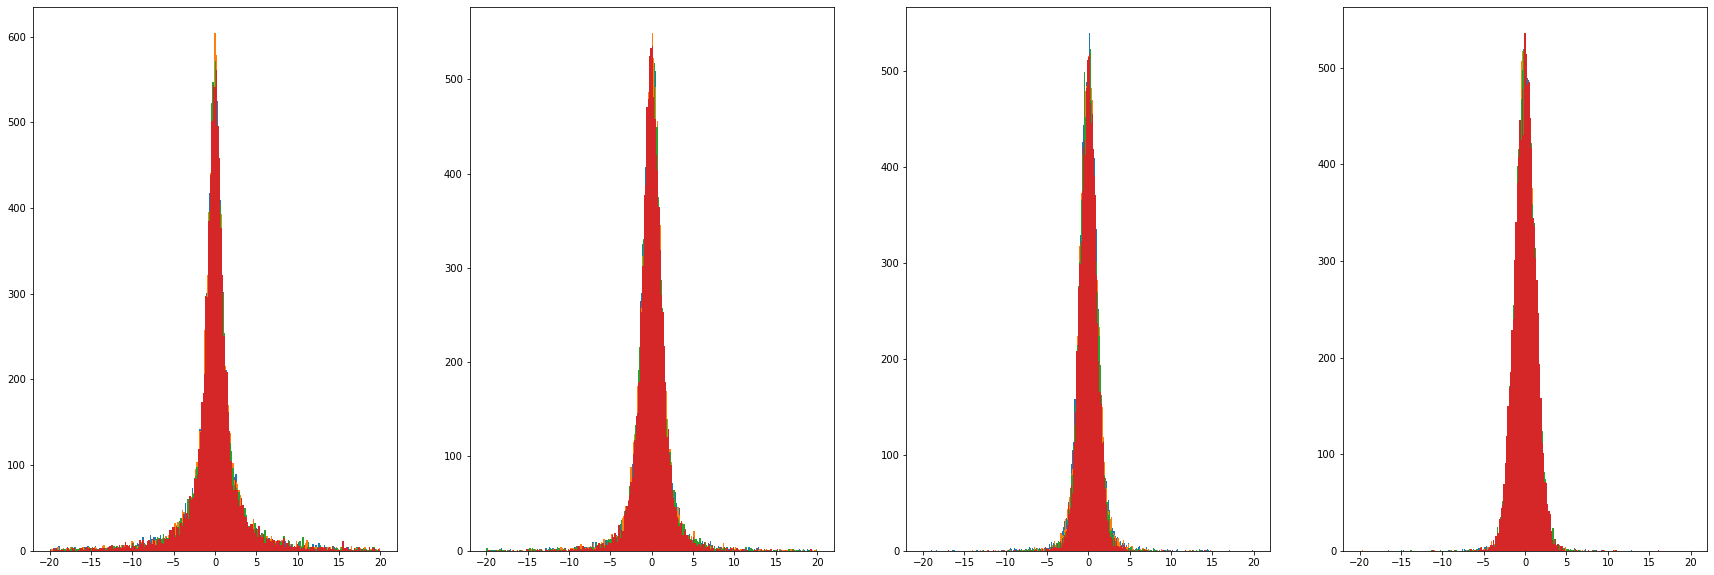

In [764]:
fig, axs = p.subplots(1,4, figsize = (30,10))
axs = axs.ravel()
N = 10000
beta = [0,0.3,0.4,0.5]
j = -1
for alpha in [2,2.5,3,3.5,]:
    j += 1
    I = quad(rho1, -10000,+10000, args=alpha)
    for M in [16,65,256,1024]:
        S = estimador(M,N,alpha)
        S = np.copy((S-1)*M**beta[j])
        axs[j].hist(S,bins = 'auto',range=(-10,10))
p.show()

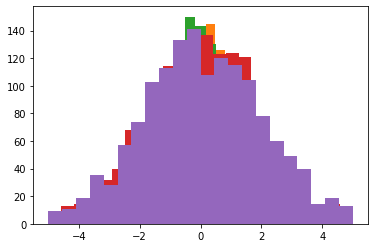

In [757]:
N = 1500
for alpha in [3.]:
    I = quad(rho1, -10000,+10000, args=alpha)
    for M in [16,65,256,1024]:
        S = estimador(M,N,alpha)
        S = np.copy((S-1)*M**0.5)
        p.hist(S,bins = 'auto',range=(-5,5))
    p.show()

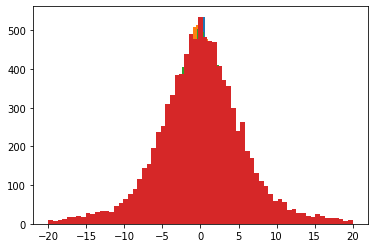

In [760]:
N = 10000
for alpha in [2.5]:
    I = quad(rho1, -10000,+10000, args=alpha)
    for M in [16,65,256,1024]:
        S = estimador(M,N,alpha)
        S = np.copy((S-1)*M**0.5)
        p.hist(S,bins = 'auto',range=(-20,20))
    p.show()